<b>

<p>
<center>
<font size="6">
Mini-Project: Analysing and Predicting Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
SC1015: Data Science and Artifial Intelligence, Nanyang Technological University
</font>
</center>
</p>

</b>

<p>
<center>
<font size="3">
<em>Done By: Chan Kit Ho and Chiang Qin Zhi</em>
</font>
</center>
</p>



In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Part 1: Data Cleaning and Preparation

First, we import the dataset from a .csv file into a Pandas DataFrame and explore the dataset.

In [65]:
LifeData = pd.read_csv('Life Expectancy Data.csv')
LifeData

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [66]:
print("Life Expectancy Dataset Shape:", LifeData.shape, "\n")
print("Life Expectancy Dataset:", LifeData.info, "\n")

Life Expectancy Dataset Shape: (2938, 22) 

Life Expectancy Dataset: <bound method DataFrame.info of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infa

Definitions of Variables:


We can see that there are multiple null or missing values. As part of the process, we will be removing them and placing them in a new DataFrame.

In [67]:
LifeData_Clean = pd.DataFrame(LifeData) #Duplicating the Dataframe
LifeData_Clean = LifeData_Clean.dropna()
LifeData_Clean = LifeData_Clean.loc[(LifeData_Clean != 0).all(axis=1)]

#LifeData_Clean = LifeData_Clean[(LifeData_Clean["Measles "]!= 0) & (LifeData_Clean["Measles "].notna())] # Removing rows with column Measles == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean["GDP"]!= 0) & (LifeData_Clean["GDP"].notna())] # Removing rows with column GDP == 0 or NA.
#LifeData_Clean = LifeData_Clean[(LifeData_Clean[" HIV/AIDS"]!= 0) & (LifeData_Clean[" HIV/AIDS"].notna())] # Removing rows with column HIV/AIDS == 0 or NA.

LifeData_Clean.to_csv('LifeData_Clean.csv')

In [68]:
LifeData_Clean


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


# Part 2: Exploratory Data Analysis (EDA)

As there too many variables, we can check the correlation of the other predictor variables with the response variable, Life Expectancy, to determine which variables to pick. 

This is because, in later sections, using too many variables will result in overfitting for our linear regression model. Though R^2 will increase by virtue of adding more variables, Adjusted R^2 which accounts for number of predictors will be affected.

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

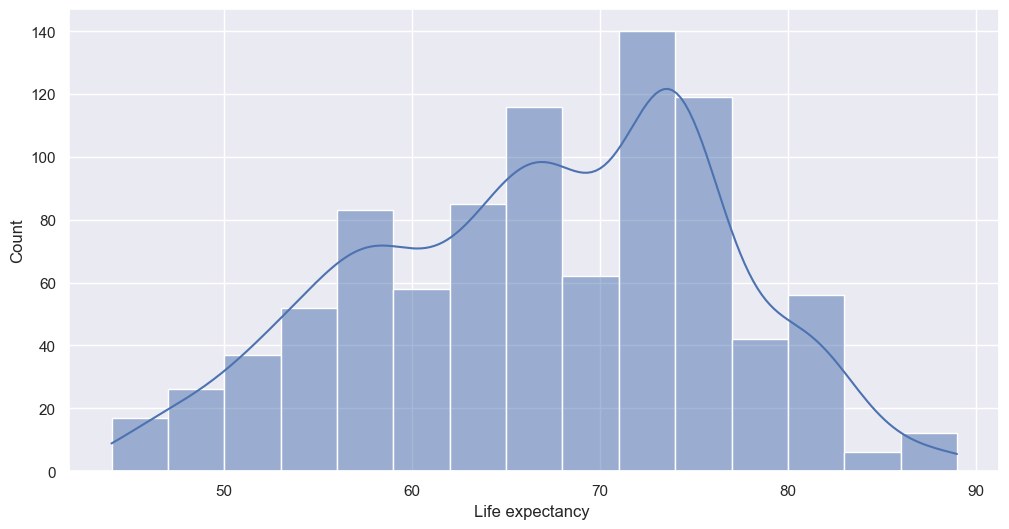

In [74]:
sns.set (rc = {'figure.figsize':(12, 6)})
sns.histplot(LifeData_Clean["Life expectancy "], kde = True)

In [ ]:
LifeData_Clean.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.002501,-0.029692,0.014219,-0.152919,0.051003,0.125062,-0.070602,-0.055215,0.017748,-0.066685,0.015462,-0.028347,-0.144144,0.091984,0.016266,0.081687,0.070472,-0.029279,0.033344
Life expectancy,-0.002501,1.000000,-0.702307,-0.125523,0.339934,0.436669,0.232307,-0.011987,0.605058,-0.153074,0.380925,0.094215,0.409093,-0.586232,0.483453,0.017780,-0.399659,-0.399611,0.864348,0.725067
Adult Mortality,-0.029692,-0.702307,1.000000,-0.008680,-0.096056,-0.249848,-0.113874,-0.055224,-0.344847,0.011892,-0.217903,-0.026324,-0.217037,0.576758,-0.276079,-0.048740,0.190015,0.210818,-0.506721,-0.382048
infant deaths,0.014219,-0.125523,-0.008680,1.000000,-0.096437,-0.105531,-0.266477,0.512668,-0.255115,0.996776,-0.160833,-0.166836,-0.176591,-0.031159,-0.116206,0.668024,0.504856,0.505224,-0.169008,-0.201424
Alcohol,-0.152919,0.339934,-0.096056,-0.096437,1.000000,0.415806,0.107109,-0.026480,0.418248,-0.088618,0.258016,0.227552,0.257898,0.027075,0.427706,-0.019540,-0.425796,-0.397185,0.563630,0.615412
percentage expenditure,0.051003,0.436669,-0.249848,-0.105531,0.415806,1.000000,-0.012179,-0.071561,0.362754,-0.107660,0.148647,0.186652,0.167297,-0.099938,0.940507,-0.007595,-0.296896,-0.300491,0.492480,0.510797
Hepatitis B,0.125062,0.232307,-0.113874,-0.266477,0.107109,-0.012179,1.000000,-0.126767,0.217891,-0.277708,0.463941,0.144559,0.567208,-0.105316,0.021015,-0.146241,-0.189816,-0.196615,0.254038,0.266996
Measles,-0.070602,-0.011987,-0.055224,0.512668,-0.026480,-0.071561,-0.126767,1.000000,-0.151210,0.496434,-0.037553,-0.124573,-0.043106,-0.037339,-0.073100,0.307627,0.156043,0.148514,-0.056756,-0.088301
BMI,-0.055215,0.605058,-0.344847,-0.255115,0.418248,0.362754,0.217891,-0.151210,1.000000,-0.264582,0.302284,0.222941,0.276014,-0.203159,0.406860,-0.073839,-0.511969,-0.522032,0.695487,0.629257
under-five deaths,0.017748,-0.153074,0.011892,0.996776,-0.088618,-0.107660,-0.277708,0.496434,-0.264582,1.000000,-0.178380,-0.164592,-0.197578,-0.018063,-0.119620,0.654803,0.505103,0.504208,-0.189023,-0.215044


Heatmap for easier visualisation.

<AxesSubplot:>

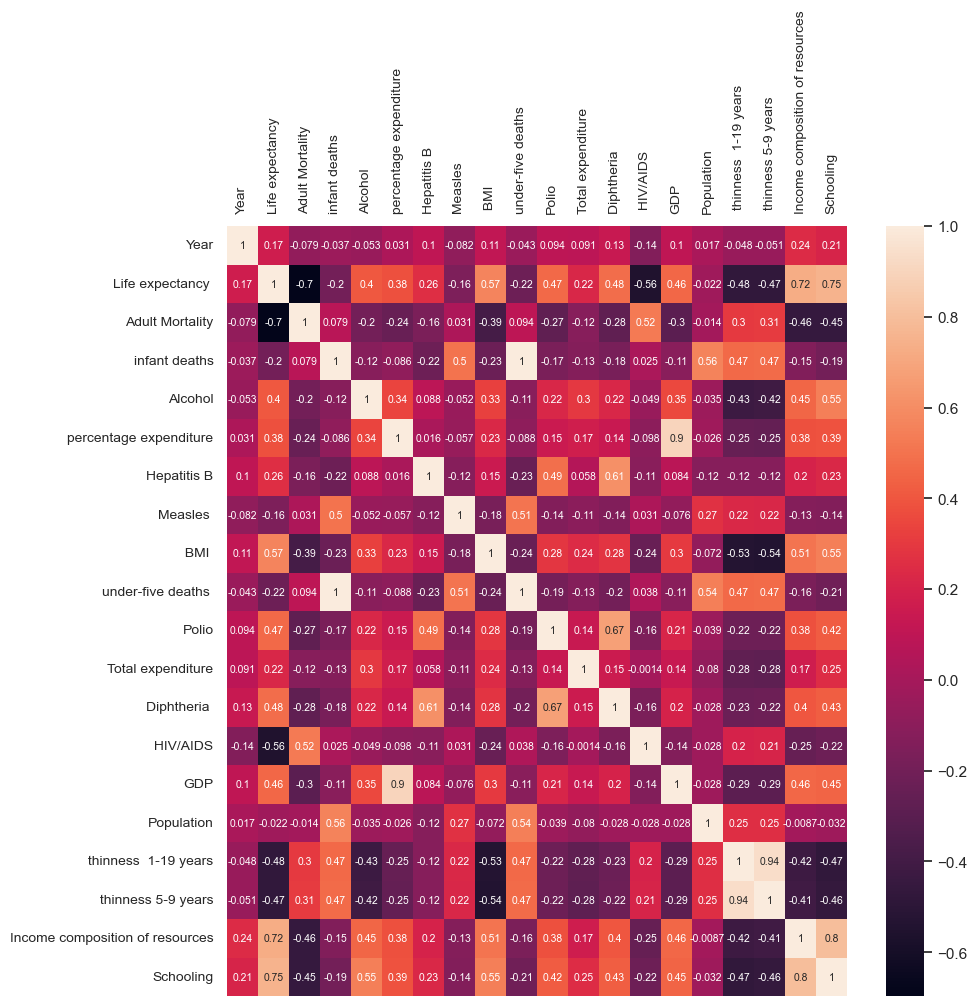

In [ ]:
sns.set (rc = {'figure.figsize':(10, 10)})
plt.tick_params(labelsize=10, labelbottom = False, labeltop=True)
sns.heatmap(LifeData.corr(), annot = True, annot_kws={"fontsize":7.5})

Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' and 'Income Composition of Resources' in the Life Expectation data.

# Part 3: Machine Learning

In [ ]:
predictors = LifeData_Clean[]